In [2]:
# To do
# Fix Dates, must be another published on vs premiered on discrepancy
# Fix Titles
# Looks like missing one (1) video for Gibi 344/345


# Import Dependencies
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', 500)

In [3]:
converted_date = ""
raw_months = {"Jan": 1, "Feb": 2, "Mar" : 3, "Apr" : 4, 
              "May" : 5, "Jun" : 6, "Jul" : 7, "Aug" : 8,
              "Sep" : 9, "Oct" : 10, "Nov" : 11, "Dec" : 12}

# Convert Date from Jan 1, 1999 format to datetime object
def convertDate(raw_date):
    
    converted_date = ""
    
    temp_date = raw_date.split(" ")
    
    number_month = raw_months.get(temp_date[0])
    
    date_str = (str(number_month) + "/" + temp_date[1] + "/" + temp_date[2]).replace(",", "")
    
    converted_date = datetime.strptime(date_str, '%m/%d/%Y')
    
    return converted_date

In [4]:
input_name = input("Enter Youtuber's Name: ")

list_name = input_name.split()

converted_name = input_name

if len(list_name) > 1:
    
    converted_name = ""
    
    for i in range(len(list_name)):

        converted_name = converted_name + list_name[i]
        
        if i != len(list_name)-1:
            converted_name = converted_name + "+"

search_name = converted_name

start_url = "https://www.youtube.com/results?search_query=" + search_name

Enter Youtuber's Name: gibi asmr


In [5]:
print(start_url)
get_youtube_url_response = requests.get(start_url)

https://www.youtube.com/results?search_query=gibi+asmr


In [6]:
youtube_name_soup = bs(get_youtube_url_response.text, "lxml")

In [7]:
raw_youtube_name_link = youtube_name_soup.find_all("div", class_="yt-lockup-byline")[0].a.get("href")

videos_link = "https://www.youtube.com" + raw_youtube_name_link + "/videos"

about_link = "https://www.youtube.com" + raw_youtube_name_link + "/about"

print(raw_youtube_name_link)
print(videos_link)
print(about_link)

/channel/UCE6acMV3m35znLcf0JGNn7Q
https://www.youtube.com/channel/UCE6acMV3m35znLcf0JGNn7Q/videos
https://www.youtube.com/channel/UCE6acMV3m35znLcf0JGNn7Q/about


In [8]:
# Get About Information
about_html = requests.get(about_link)

# Parse HTML
about_soup = bs(about_html.text, "lxml")

In [9]:
# Artist Information
artist_name = about_soup.find("meta", property="og:title").get("content")

subscribers = about_soup.find_all("span", class_="about-stat")[0].text
subscribers_int = int(subscribers.split(" ")[0].replace(",",""))

total_views = about_soup.find_all("span", class_="about-stat")[1].text
total_views_int = int(total_views[3:len(total_views)].split(" ")[0].replace(",",""))

joined = about_soup.find_all("span", class_="about-stat")[2].text
joined_temp = " ".join(joined.split(" ")[1:4])
joined_convert = convertDate(joined_temp)

print(f"Artist: {artist_name}")
print(f"Subscribers: {subscribers_int}")
print(f"Views: {total_views_int}")
print(f"Joined: {joined_convert}")

Artist: Gibi ASMR
Subscribers: 1528028
Views: 381641192
Joined: 2016-06-18 00:00:00


In [10]:
# Convert User Name to UU Format
youtube_code = raw_youtube_name_link.split("/")[2]

if youtube_code[0:2] == "UC":
    
    youtube_code = raw_youtube_name_link.split("/")[2]

    playlist_link = "https://www.youtube.com" + "/playlist?list=UU" + youtube_code[2:] 

elif youtube_code[0:2] != "UC":
    
    youtube_code_raw = about_soup.find("link", rel="canonical").get("href")
    
    youtube_code = youtube_code_raw.split("/")[4]
    
    playlist_link = "https://www.youtube.com" + "/playlist?list=UU" + youtube_code[2:]  
    

print(playlist_link)

https://www.youtube.com/playlist?list=UUE6acMV3m35znLcf0JGNn7Q


In [11]:
# Get Playlist Response
playlist_response = requests.get(playlist_link)

In [12]:
# Create Soup Object
playlist_soup = bs(playlist_response.text, 'lxml')

In [13]:
# Second URL Approach
# https://www.youtube.com/watch?v=M0xRCrqaffA&list=UUE6acMV3m35znLcf0JGNn7Q&t=0s&index=2
first_video = "https://www.youtube.com" + playlist_soup.find_all("a", class_="pl-video-title-link")[0].get("href").split("&")[0]
first_video_within_playlist = first_video + "&" + playlist_link.split("?")[1]

print(first_video_within_playlist)

https://www.youtube.com/watch?v=M0xRCrqaffA&list=UUE6acMV3m35znLcf0JGNn7Q


In [14]:
playlist_inside_request = requests.get(first_video_within_playlist) 

playlist_inside_soup = bs(playlist_inside_request.text, "lxml")


In [15]:
urls_all = []
i=0
index=2
# number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) - 1
total_videos_in_playlist = int(playlist_inside_soup.find("span", id="playlist-length").text.replace(" videos",""))
number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) 
#start_video_new_page = playlist_inside_soup.find("span", class_="index").text.replace("\n        ","").replace("\n    ","")
#last_video_index = int(last_shown_link[last_shown_link.find("index"):].replace("index=","")[:2])
last_video_index = int(playlist_inside_soup.find_all("span", class_="index")[-1].text.replace("\n        ","").replace("\n    ",""))

bump = 0
#last_shown_link = playlist_inside_soup.find("a", title="Previous video").get("href")
last_shown_link = playlist_inside_soup.find_all("span", class_="index")[-1].find_next("a").get("href")

link_fix = "https://www.youtube.com" + last_shown_link
    
for i in range(total_videos_in_playlist-1):   

    if i == 0:
        #print("loop 1")
        #number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) - 1
        
        first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        {len(urls_all)+2}\n    ")
        
        url = "https://www.youtube.com" + first_link.find_next("a").get("href")
        
        original_url = url.split("&")[0]

        urls_all.append(original_url)
        
        next_link = first_link
        
    elif i == last_video_index - 1:
        
        #print("loop 2!!!----------------------------")

        playlist_inside_request = requests.get(link_fix)
        
        playlist_inside_soup = bs(playlist_inside_request.text, "lxml")
        
        #Wrong
        #last_shown_link = playlist_inside_soup.find("a", title="Previous video").get("href")
        last_shown_link = playlist_inside_soup.find_all("span", class_="index")[-1].find_next("a").get("href")
        
        link_fix = "https://www.youtube.com" + last_shown_link
        
        #last_video_index = int(last_shown_link[last_shown_link.find("index"):].replace("index=","")[:2])+2
        
        last_video_index = int(playlist_inside_soup.find_all("span", class_="index")[-1].text.replace("\n        ","").replace("\n    ",""))
                        
        start_video_new_page_text = playlist_inside_soup.find("span", class_="index").text.replace("\n        ","").replace("\n    ","")

        if start_video_new_page_text == "▶":
            start_video_new_page_html = playlist_inside_soup.find_all("span", class_="index")[1]

        else:
            start_video_new_page_html = playlist_inside_soup.find_all("span", class_="index")[0]
        
        first_link = start_video_new_page_html
        
        next_link = first_link
        
        next_url = "https://www.youtube.com" + next_link.find_next("a").get("href")
        
        original_url = next_url.split("&")[0]
        
        urls_all.append(original_url)
        
        number_of_videos_in_page = len(playlist_inside_soup.find_all("span", class_="index")) - 1
              
    else:
        #print("loop 3")
        first_link = playlist_inside_soup.find("span", class_="index", text=f"\n        {i+1}\n    ")
        
        next_link = first_link
        
        next_link = next_link.find_next("span", class_="index")
        
        next_url = "https://www.youtube.com" + next_link.find_next("a").get("href")
        
        original_url = next_url.split("&")[0]
        
        urls_all.append(original_url)

    


In [79]:
# Get Video Titles and URLs
# title_videos = []
# urls = []

# video_info = playlist_soup.find_all("a", class_="pl-video-title-link")

# for title in video_info:
    
#     title_videos.append(title.text.replace("\n      ","").replace("\n    ",""))
    
#     link = "https://www.youtube.com" + title.get("href").split("&")[0]
    
#     urls.append(link)

In [ ]:
# Going to Each Video and Extracting Data
published_on = []
raw_published_on = []
views = []
date = []
duration_videos = []
likes = []
dislikes = []
title_videos = []

for i in range(len(urls_all)):
    
    video_url = urls_all[i]
    
    video_response = requests.get(video_url)
    
    video_soup = bs(video_response.text, 'lxml')
    
    # Title
    video_soup.find("title").text.replace(" - YouTube", "")
    
    
    # Views
    string_views = video_soup.find("div", id="watch7-views-info").text.replace(" views\n\n\n\n\n", "").replace(",","") 
    int_views = int(string_views)
    views.append(int_views)
    
#     # Duration
#     duration = video_soup.find("span", class_="video-time").text
#     duration_videos.append(duration)
    
    # Likes
    string_likes = video_soup.find("button", title="I like this").text
    int_likes = int(string_likes.replace(",",""))
    likes.append(int_likes)
    
    # Dislikes
    string_dislikes = video_soup.find("button", title="I dislike this").text
    int_dislikes = int(string_dislikes.replace(",",""))
    dislikes.append(int_dislikes)
    
    # Publish Date
    raw_publish_date = video_soup.find("div", id="watch-uploader-info").text
    
    raw_published_on.append(raw_publish_date)
    
    if raw_publish_date.split(" ")[0] == "Published":
        
        publish_date = raw_publish_date.split(" ")[2:5]

        publish_date_format = " ".join(publish_date)
        
        publish_date_convert = convertDate(publish_date_format)

        published_on.append(publish_date_convert)
    
    elif raw_publish_date.split(" ")[0] == "Premiered":
        
        publish_date = raw_publish_date.split(" ")[1:4]

        publish_date_format = " ".join(publish_date)
        
        publish_date_convert = convertDate(publish_date_format)

        published_on.append(publish_date_convert)

In [1211]:
# Create DataFrame
df = pd.DataFrame({"Artist" : artist_name,
                   "Joined" : joined_convert,
                   "Subscribers" : subscribers_int,
                   "Total Views" : total_views_int,
                   #"Date": published_on,
                   #"Title" : title_videos,
                   #"Duration" : duration_videos,
                   "Views" : views,
                   "Likes" : likes,
                   "Dislikes" : dislikes,
                   "URL" : urls_all,
                  })

#df = df.sort_values("Date",ascending=False).reindex()
df

,Artist,Joined,Subscribers,Total Views,Views,Likes,Dislikes,URL
0,Gibi ASMR,2016-06-18,1527214,381353194,366448,10225,228,https://www.youtube.com/watch?v=doS3YF55xX4
1,Gibi ASMR,2016-06-18,1527214,381353194,196884,6166,132,https://www.youtube.com/watch?v=Fg9mdZvT-_U
2,Gibi ASMR,2016-06-18,1527214,381353194,280026,7944,224,https://www.youtube.com/watch?v=U5k9Dff4voY
3,Gibi ASMR,2016-06-18,1527214,381353194,979112,17826,468,https://www.youtube.com/watch?v=cu3sm0rmDQY
4,Gibi ASMR,2016-06-18,1527214,381353194,474454,11919,262,https://www.youtube.com/watch?v=nv7gnnRQvS0
5,Gibi ASMR,2016-06-18,1527214,381353194,713459,14989,880,https://www.youtube.com/watch?v=GYgQrnvzNeo
6,Gibi ASMR,2016-06-18,1527214,381353194,596616,18147,538,https://www.youtube.com/watch?v=NrxIxEzyg90
7,Gibi ASMR,2016-06-18,1527214,381353194,437190,14133,302,https://www.youtube.com/watch?v=jRY4GAYR4rA
8,Gibi ASMR,2016-06-18,1527214,381353194,496343,13256,287,https://www.youtube.com/watch?v=s4rAhZ-o2t8
9,Gibi ASMR,2016-06-18,1527214,381353194,710729,15084,451,https://www.youtube.com/watch?v=s__lrPUJj24


In [1215]:
published_on

[datetime.datetime(2018, 12, 6, 0, 0),
 datetime.datetime(2018, 12, 4, 0, 0),
 datetime.datetime(2018, 12, 1, 0, 0),
 datetime.datetime(2018, 11, 29, 0, 0),
 datetime.datetime(2018, 11, 27, 0, 0),
 datetime.datetime(2018, 11, 26, 0, 0),
 datetime.datetime(2018, 11, 24, 0, 0),
 datetime.datetime(2018, 11, 22, 0, 0),
 datetime.datetime(2018, 11, 20, 0, 0),
 datetime.datetime(2018, 11, 17, 0, 0),
 datetime.datetime(2018, 11, 15, 0, 0),
 datetime.datetime(2018, 11, 13, 0, 0),
 datetime.datetime(2018, 11, 10, 0, 0),
 datetime.datetime(2018, 11, 8, 0, 0),
 datetime.datetime(2018, 11, 6, 0, 0),
 datetime.datetime(2018, 11, 4, 0, 0),
 datetime.datetime(2018, 11, 1, 0, 0),
 datetime.datetime(2018, 10, 30, 0, 0),
 datetime.datetime(2018, 10, 27, 0, 0),
 datetime.datetime(2018, 10, 25, 0, 0),
 datetime.datetime(2018, 10, 23, 0, 0),
 datetime.datetime(2018, 10, 20, 0, 0),
 datetime.datetime(2018, 10, 18, 0, 0),
 datetime.datetime(2018, 10, 16, 0, 0),
 datetime.datetime(2018, 10, 13, 0, 0),
 dateti

In [1]:
(df.Views.sum()/1000000)*2000

NameError: name 'df' is not defined

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

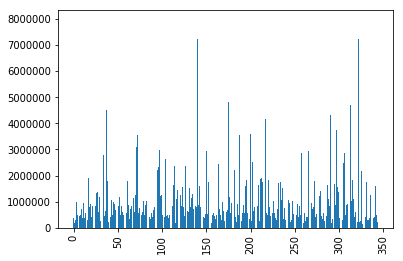

In [1212]:
# Graph Data
#plt.bar(np.arange(0,len(df),1),df["Views"], tick_label = df["Date"])
plt.bar(np.arange(0,len(df),1),df["Views"])
plt.xticks(rotation=90)